In [1]:
import torch
from torchvision.models import *
from fastai.vision import *

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import gc

In [3]:
# Getting our paths 
images_path = f'{os.curdir}/model_data/images_unscattered'
labels_path = f'{os.curdir}/model_data/unscattered.csv'
path = f'{os.curdir}/model_data'

In [4]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.2, max_lighting=0.1, max_warp=0.0)

# Creating source object
seed = np.random.seed(42)
src = (ImageItemList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                     .random_split_by_pct(0.1, seed)
                     .label_from_df())

# Creating data object function - returns data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    
    return data

In [5]:
data = get_data((200,300), 8)
# data = get_data((400, 600), 4)

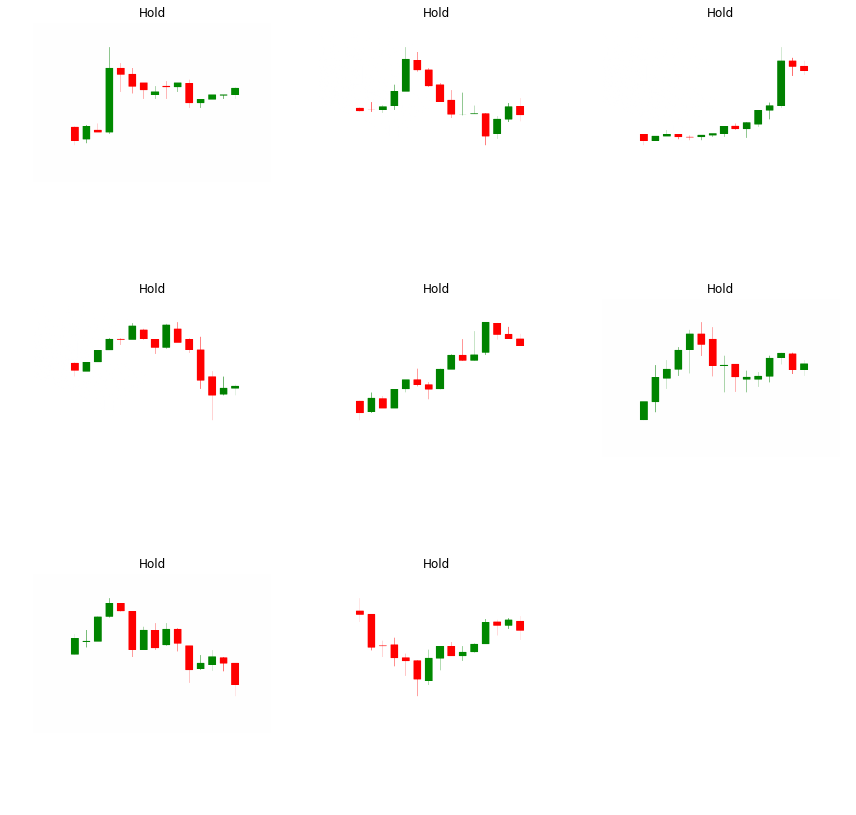

In [7]:
data.show_batch()

In [8]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (10782 items)
[Category Hold, Category Hold, Category Hold, Category Hold, Category Hold]...
Path: model_data
x: ImageItemList (10782 items)
[Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600)]...
Path: model_data;

Valid: LabelList
y: CategoryList (1198 items)
[Category Hold, Category Hold, Category Hold, Category Hold, Category Hold]...
Path: model_data
x: ImageItemList (1198 items)
[Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600)]...
Path: model_data;

Test: None

In [6]:
arch = models.resnet50

learn = create_cnn(data, arch, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


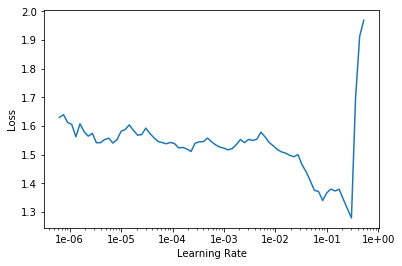

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
lr = 4e-2

In [9]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.834040,1.300492,0.435726
2,0.838412,8.405857,0.798831
3,0.707826,4.034952,0.808013
4,0.572576,1.519980,0.825543
5,0.519375,0.640441,0.825543


# ResNet101

In [6]:
arch = models.resnet101

learn = create_cnn(data, arch, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:08<00:00, 19863678.12it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


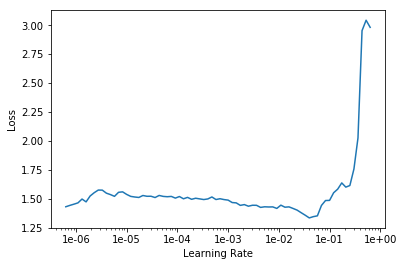

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
lr = 7e-3

In [10]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.677476,0.624817,0.827212
2,0.555895,1.131681,0.779633
3,0.596898,1.211388,0.818030
4,0.495560,0.579181,0.821369
5,0.485970,0.690594,0.817195


# ResNet152

In [6]:
arch = models.resnet152

learn = create_cnn(data, arch, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


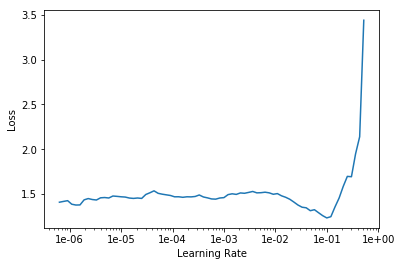

In [7]:
learn.lr_find()
learn.recorder.plot()